# Lab1. Введение
## Задание 1

Зафиксируем для рассмотрения экспоненциальное распределение.

То есть, пусть случайная величина $X \sim \mathrm{Exp}(\lambda)$ с плотностью $p(x)$ и функцией распределения $F(x)$ 
$$
p(x) = \lambda e^{-\lambda x} \quad F(x) = 1 - e^{-\lambda x}, \quad x \ge 0 \ \lambda > 0
$$

Четвёртый момент определяется как
$$
\mathbb{E}[X^4] = \int_{0}^{\infty} x^4 \, \lambda e^{-\lambda x} \, dx
$$

Сделаем замену переменной $y = \lambda x$, тогда $x = y/\lambda$, $dx = dy/\lambda$. Получаем:
$$
\mathbb{E}[X^4] = \frac{1}{\lambda^4} \int_{0}^{\infty} y^4 e^{-y} \, dy
$$

Интеграл справа — это значение гамма-функции:
$$
\int_{0}^{\infty} y^4 e^{-y} \, dy = \Gamma(5) = 4! = 24
$$

Следовательно,
$$
\mathbb{E}[X^4] = \frac{24}{\lambda^4}
$$

Таким образом, четвёртый момент экспоненциального распределения существует для любого $\lambda > 0$.





In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma

rng = np.random.default_rng(42)

lamda = 1
F = lambda x: 1 - np.exp(-lamda * x)
p = lambda x: lamda * np.exp(-lamda * x)

Возмём $m = 42000$ выборок объёма $n = 4200$. Пусть также $\lambda = 1$.

Существование четвёртого момента у распределения важно для исследования выборочной дисперсии. Выборочное среднее будет стремиться к матожиданию. Для применения ЦПТ величины $ (X - \mu)^2$ должны иметь конечную дисперсию. Так как дисперсия -- второй центральный момент, то формула дисперсии преобретает вид:

$$
Var [(X - \mu)^2]= \mathbb{E} [(X - \mu)^4] - (\mathbb{E} [(X -\mu)^2])^2
$$

Посчитаем четвёртый центральный момент, который будет нам интересен:

$$
\mu_4 = \mathbb{E}\big[(X - \mu)^4\big], \quad X \sim \mathrm{Exp}(\lambda), \; \mu = \tfrac{1}{\lambda}
$$

$$
\mu_4 = \mathbb{E}[X^4] - 4\mu \,\mathbb{E}[X^3] + 6\mu^2 \,\mathbb{E}[X^2] - 4\mu^3 \,\mathbb{E}[X] + \mu^4
$$

$$
\mathbb{E}[X]   = \tfrac{1}{\lambda}, \quad
\mathbb{E}[X^2] = \tfrac{2}{\lambda^2}, \quad
\mathbb{E}[X^3] = \tfrac{6}{\lambda^3}, \quad
\mathbb{E}[X^4] = \tfrac{24}{\lambda^4}
$$

$$
\mu_4 = \frac{24}{\lambda^4}
- 4 \cdot \frac{1}{\lambda}\cdot \frac{6}{\lambda^3}
+ 6 \cdot \frac{1}{\lambda^2}\cdot \frac{2}{\lambda^2}
- 4 \cdot \frac{1}{\lambda^3}\cdot \frac{1}{\lambda}
+ \frac{1}{\lambda^4}
$$

$$
\mu_4 = \frac{24}{\lambda^4}
- \frac{24}{\lambda^4}
+ \frac{12}{\lambda^4}
- \frac{4}{\lambda^4}
+ \frac{1}{\lambda^4}
$$

$$
\mu_4 = \frac{9}{\lambda^4}
$$


In [43]:
n = 4200
m = 42000

E = 1 / lamda
Var_of_exp = 1 / lamda**2
E4_center = 9 / lamda**4
Var_of_modif_exp = E4_center - Var_of_exp**2

Пусть $F$ -- функция распределения $X$, тогда квантиль порядка $p$ есть число $q_p$, такое что
$$
F(q_p) = p
$$

Квантиль порядка $0.5$ называется медианой. Для медианы $p = 0.5$. Тогда $q_{0.5} = med$ — это та точка, до и после которой находится половина вариантов.

Медиана решает уравнение $F(med) = 0.5$:
$$
1 - e^{-\lambda med} = 0.5 \;\;\;\;\Rightarrow\;\;\;\; med= \frac{\ln 2}{\lambda}
$$

Для дальнейшего исследования обратимся к теореме об асимптотике средних членов вариационного ряда:

$$
\sqrt{n}\,\frac{X_{[ceil(np)]} - q_p}{\sqrt{p(1-p)}} f(q_p)
\;\;\;\xrightarrow{d}\;\;\; U \sim N(0,1)
$$

или

$$
\sqrt{n}\,\big(X_{[ceil(np)]} - q_p\big)
\;\;\;\xrightarrow{d}\;\;\; N\!\left(0,\, \theta^2 \right), \quad \theta^2 = \frac{p(1-p)}{f(q_p)^2}
$$

In [44]:
# медиана = q_0.5
# p = 0.5
med_true = np.log(2) / lamda
p_med = p(med_true)
theta2 = 0.25 / p_med**2   # асимптотическая дисперсия медианы

# набор выборок
X = rng.exponential(scale=lamda, size=(m, n))
X_sorted = np.sort(X, axis=1)

In [45]:
# 1) выборочное среднее
xbar = X.mean(axis=1)
Chosen_mean = np.sqrt(n) * (xbar - E)

# 2) выборочная дисперсия
S2 = X.var(axis=1, ddof=0)
Chosen_var = np.sqrt(n) * (S2 - Var_of_exp)

# 3) выборочная медиана
qh = np.median(X, axis=1)
Chosen_med = np.sqrt(n) * (qh - med_true)

# 4) крайние порядковые статистики
X_2   = X_sorted[:, 1]
X_n_2 = X_sorted[:, n-3]
U1 = n * F(X_2)               # Gamma(2,1)
U2 = n * (1 - F(X_n_2))       # Gamma(3,1)

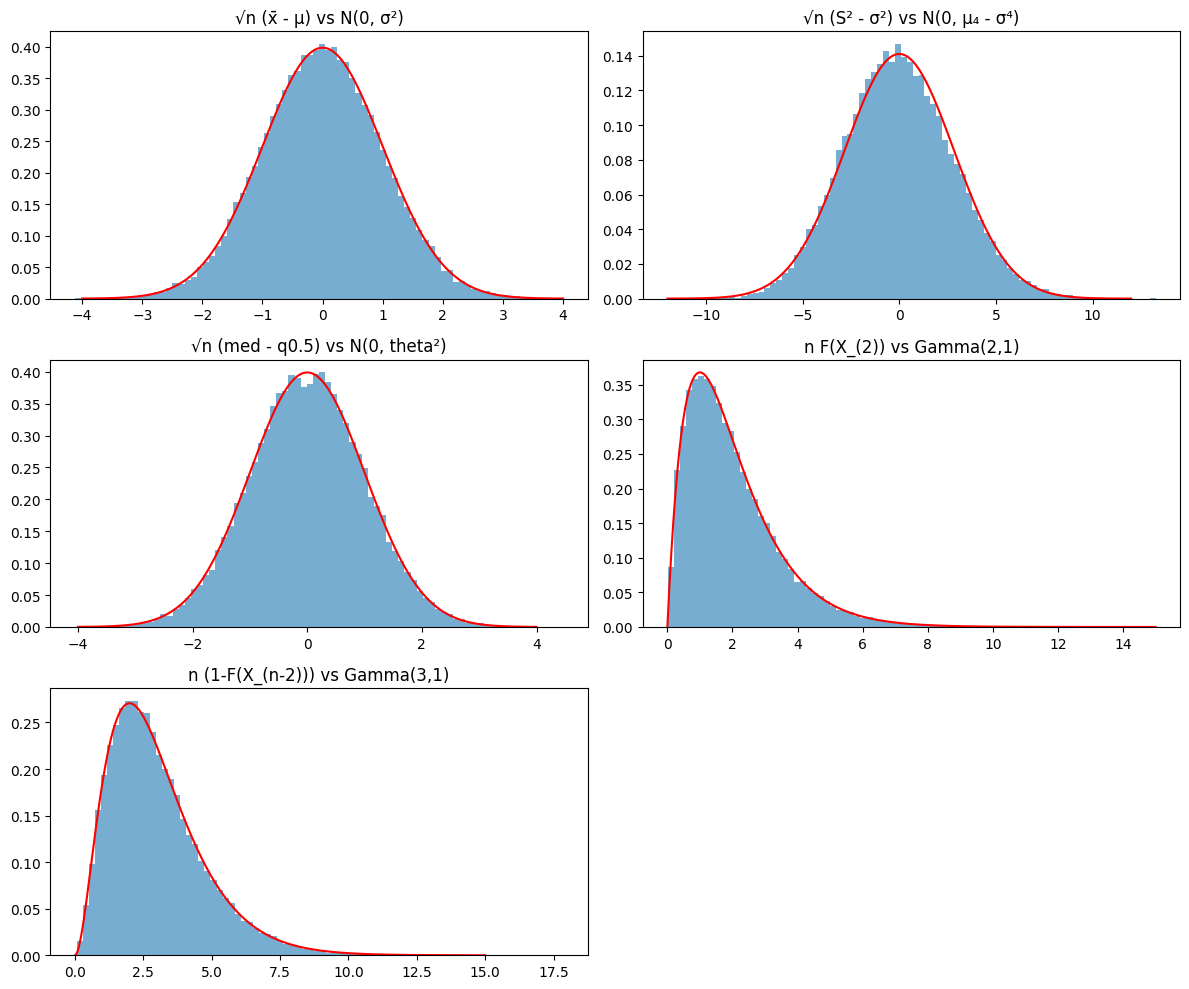

Var(Exp(1)) = 1.0
Var((S_*)²) = 8.0
Var(Med) = 1.0
Med = 0.6931471805599453 , p(med)= 0.5
Chosen_mean  | медиана = -0.0013 | стандартное отклонение =  0.9970
Chosen_var   | медиана = -0.0213 | стандартное отклонение =  2.8144
Chosen_med   | медиана =  0.0040 | стандартное отклонение =  0.9972
U1           | медиана =  1.9954 | стандартное отклонение =  1.4142
U2           | медиана =  2.9936 | стандартное отклонение =  1.7180


In [46]:
def hist_and_pdf(ax, data, xs, pdf_vals, title):
    ax.hist(data, bins=80, density=True, alpha=0.6)
    ax.plot(xs, pdf_vals, 'r')
    ax.set_title(title)

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.ravel()

# 1) ЦПТ для среднего
xs = np.linspace(-4,4,400)
hist_and_pdf(axes[0], Chosen_mean, xs, norm.pdf(xs, 0, np.sqrt(Var_of_exp)),
             "√n (x̄ - μ) vs N(0, σ²)")

# 2) ЦПТ для дисперсии
xs = np.linspace(-12,12,600)
hist_and_pdf(axes[1], Chosen_var, xs, norm.pdf(xs, 0, np.sqrt(Var_of_modif_exp)),
             "√n (S² - σ²) vs N(0, μ₄ - σ⁴)")

# 3) ЦПТ для медианы
xs = np.linspace(-4,4,400)
hist_and_pdf(axes[2], Chosen_med, xs, norm.pdf(xs, 0, np.sqrt(theta2)),
             "√n (med - q0.5) vs N(0, theta²)")

# 4) Крайние порядковые статистики
xs = np.linspace(0,15,500)
hist_and_pdf(axes[3], U1, xs, gamma(a=2, scale=1).pdf(xs),
             "n F(X_(2)) vs Gamma(2,1)")
hist_and_pdf(axes[4], U2, xs, gamma(a=3, scale=1).pdf(xs),
             "n (1-F(X_(n-2))) vs Gamma(3,1)")

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

print("Var(Exp(1)) =", Var_of_exp)
print("Var((S_*)²) =", Var_of_modif_exp)
print("Var(Med) =", theta2)
print("Med =", med_true, ", p(med)=", p_med)

stats = {
    "Chosen_mean": Chosen_mean,
    "Chosen_var":  Chosen_var,
    "Chosen_med":  Chosen_med,
    "U1":          U1,
    "U2":          U2
}

for name, arr in stats.items():
    mean_val = np.mean(arr)
    sd_val   = np.std(arr)
    print(f"{name:12s} | медиана = {mean_val: .4f} | стандартное отклонение = {sd_val: .4f}")


# Задание 2


Сколько моделей поддерживают 2 SIM: 1019
Сколько моделей поддерживают 3G: 1523
Максимальное число ядер CPU: 8

Батарея (вся совокупность):
mean = 1238.518, var = 192991.816, median = 1226.000, q_0.6 = 1395.400

Батарея по группам:
Wi-Fi=False: mean = 1242.235, var = 195929.525, median = 1222.000, q_0.6 = 1403.000
Wi-Fi=True:  mean = 1234.904, var = 190108.731, median = 1233.000, q_0.6 = 1390.400


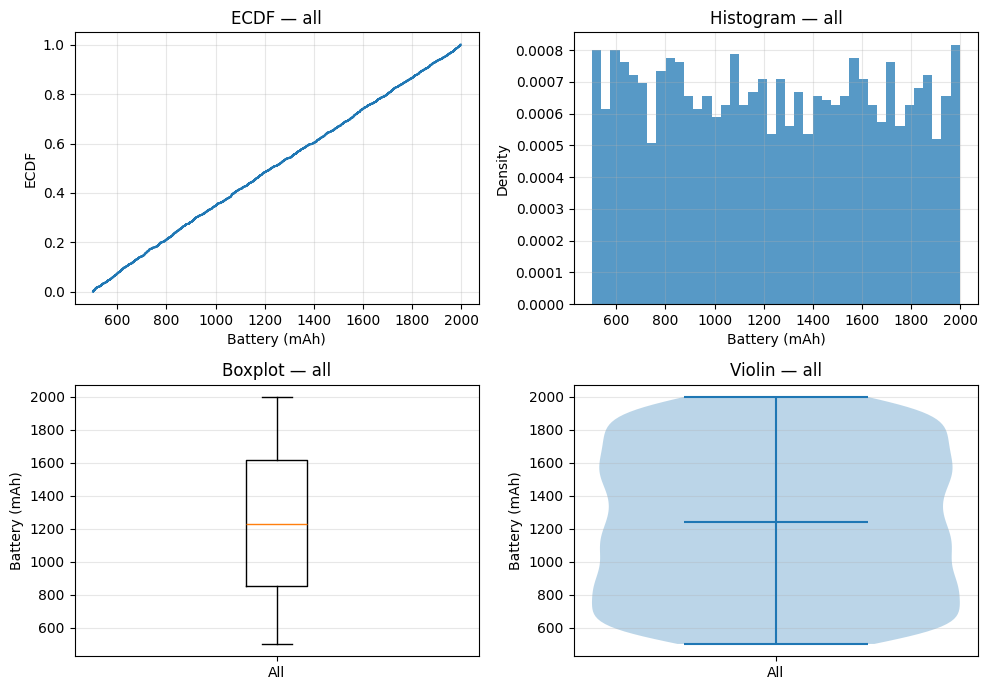

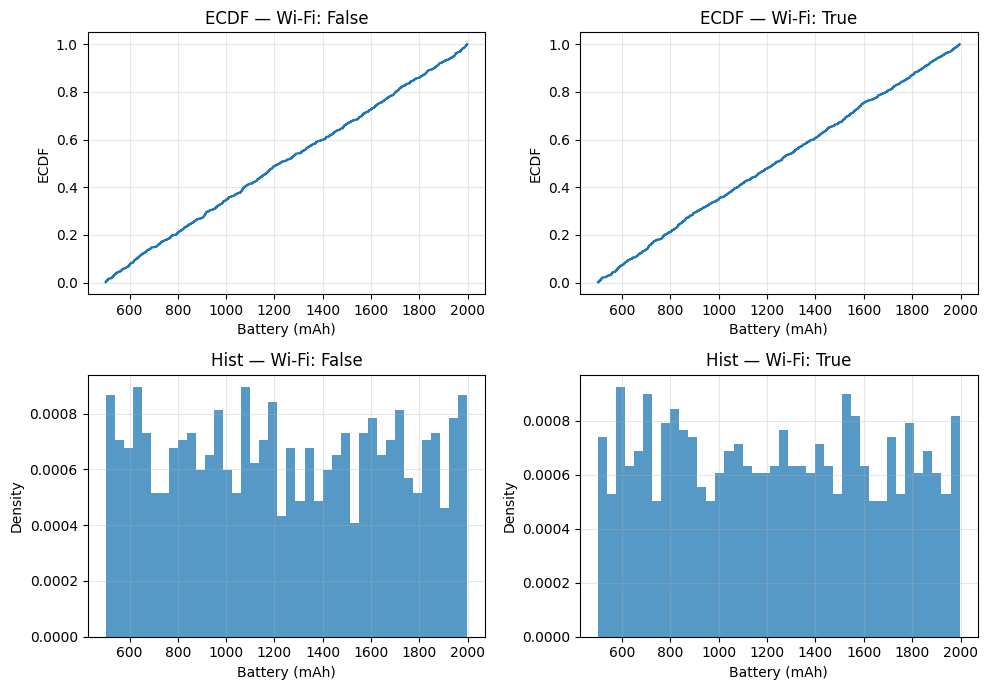

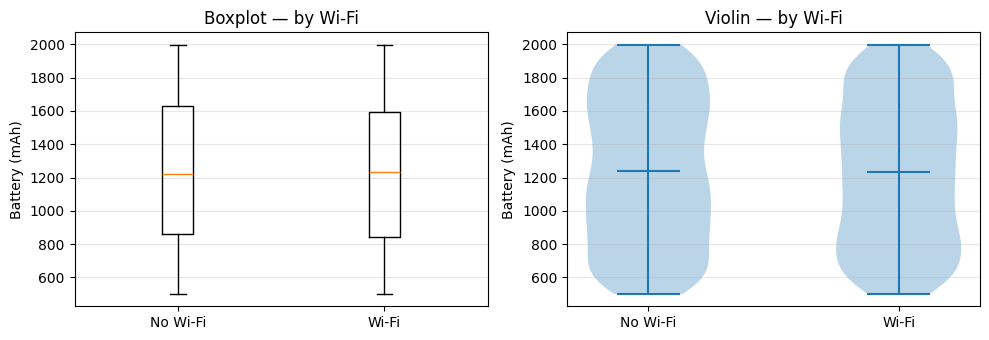

In [47]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def to_bool_series(s: pd.Series, yes_patterns):
    if pd.api.types.is_bool_dtype(s):
        return s.fillna(False)
    if pd.api.types.is_numeric_dtype(s):
        return (s.fillna(0) >= 1)
    ypat = re.compile(yes_patterns, re.I)
    return s.apply(lambda x: False if pd.isna(x) else (str(x).strip().lower() 
            in {"1","y","yes","true","да","+","ok","supported","support"} or bool(ypat.search(str(x)))))

def extract_int_series(s: pd.Series):
    return pd.to_numeric(s, errors="coerce") if pd.api.types.is_numeric_dtype(s) else s.astype(str).str.extract(r"(-?\d+)")[0].astype(float)

def extract_float_series(s: pd.Series):
    if pd.api.types.is_numeric_dtype(s):
        return pd.to_numeric(s, errors="coerce")
    t = s.astype(str).str.replace(",", ".", regex=False)
    return t.str.extract(r"(-?\d+(?:\.\d+)?)")[0].astype(float)

def ax_ecdf(ax, values, title):
    v = np.sort(values)
    y = np.arange(1, len(v)+1) / len(v)
    ax.step(v, y, where="post")
    ax.set_xlabel("Battery (mAh)"); ax.set_ylabel("ECDF"); ax.set_title(title); ax.grid(True, alpha=0.3)

def ax_hist(ax, values, title, bins=40):
    ax.hist(values, bins=bins, density=True, alpha=0.75)
    ax.set_xlabel("Battery (mAh)"); ax.set_ylabel("Density"); ax.set_title(title); ax.grid(True, alpha=0.3)

def ax_box(ax, values, labels):
    ax.boxplot(values, labels=labels, showfliers=True)
    ax.set_ylabel("Battery (mAh)"); ax.grid(True, axis="y", alpha=0.3)

def ax_violin(ax, values, labels):
    ax.violinplot(values, showmeans=True, showextrema=True)
    ax.set_xticks(np.arange(1, len(labels)+1))
    ax.set_xticklabels(labels)
    ax.set_ylabel("Battery (mAh)"); ax.grid(True, axis="y", alpha=0.3)

def stats_line(arr):
    return f"mean = {np.mean(arr):.3f}, var = {np.var(arr, ddof=0):.3f}, median = {np.median(arr):.3f}, q_0.6 = {np.quantile(arr, 0.6):.3f}"

path = "./mobile_phones.csv"
try:
    df = pd.read_csv(path)
except UnicodeDecodeError:
    df = pd.read_csv(path, encoding="utf-8-sig")

find_col = lambda df, pats: next((c for c in df.columns for p in [re.compile(pp, re.I) for pp in pats] if p.search(str(c))), None)
col_dual   = find_col(df, [r"\bdual", r"\b2\s*sim", r"\bsim\s*2", r"two\s*sim", r"dual[_\s-]*sim"]) 
col_3g     = find_col(df, [r"\b3\s*g\b", r"three[_\s-]*g\b"])  
col_cores  = find_col(df, [r"\bn[_\s-]*cores?\b", r"\bcores?\b"]) 
col_batt   = find_col(df, [r"batt", r"mAh", r"\bmah\b"]) 
col_wifi   = find_col(df, [r"wi[-\s_]*fi", r"\bwlan\b"]) 

# приведение
dual  = to_bool_series(df[col_dual], r"\bdual|\b2\b.*sim|two\s*sim")
sup3g = to_bool_series(df[col_3g],   r"\b3\s*g\b|three[_\s-]*g")
cores = extract_int_series(df[col_cores])
batt  = extract_float_series(df[col_batt])
wifi  = to_bool_series(df[col_wifi], r"wi[-\s_]*fi|\bwlan\b")

b = batt.where(batt > 0).dropna()

# ans
print("\nСколько моделей поддерживают 2 SIM:", int(dual.sum()))
print("Сколько моделей поддерживают 3G:", int(sup3g.sum()))
print("Максимальное число ядер CPU:", int(np.nanmax(cores.values)))
print("\nБатарея (вся совокупность):")
print(f"mean = {float(b.mean()):.3f}, var = {float(b.var(ddof=0)):.3f}, median = {float(b.median()):.3f}, q_0.6 = {float(b.quantile(0.6)):.3f}")

mask = wifi.loc[b.index].values
no_wifi = b.values[mask==False]
has_wifi = b.values[mask==True]

print("\nБатарея по группам:")
print("Wi-Fi=False: " + stats_line(no_wifi))
print("Wi-Fi=True:  " + stats_line(has_wifi))

fig1, axs1 = plt.subplots(2, 2, figsize=(10, 7))
axs1 = axs1.ravel()
ax_ecdf(axs1[0], b.values, "ECDF — all")
ax_hist(axs1[1], b.values, "Histogram — all", bins=40)
ax_box(axs1[2], [b.values], ["All"]) ; axs1[2].set_title("Boxplot — all")
ax_violin(axs1[3], [b.values], ["All"]) ; axs1[3].set_title("Violin — all")
plt.tight_layout(); plt.show()

fig2, axs2 = plt.subplots(2, 2, figsize=(10, 7))
ax_ecdf(axs2[0,0], no_wifi, "ECDF — Wi-Fi: False")
ax_ecdf(axs2[0,1], has_wifi, "ECDF — Wi-Fi: True")
ax_hist(axs2[1,0], no_wifi, "Hist — Wi-Fi: False", bins=40)
ax_hist(axs2[1,1], has_wifi, "Hist — Wi-Fi: True", bins=40)
plt.tight_layout(); plt.show()

labels = ["No Wi-Fi", "Wi-Fi"]
fig3, axs3 = plt.subplots(1, 2, figsize=(10, 3.5))
ax_box(axs3[0], [no_wifi, has_wifi], labels); axs3[0].set_title("Boxplot — by Wi-Fi")
ax_violin(axs3[1], [no_wifi, has_wifi], labels); axs3[1].set_title("Violin — by Wi-Fi")
plt.tight_layout(); plt.show()